In [1]:
import sys
sys.path.append('..')
from config.config import *
# from src.AlertReceiver import *
# from src.GeckoHelper import *
from util.util import *

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [3]:
distmean = 373.4
diststd = 104.2
phase = 0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

# ------------------------------
# 1. t₀ 설정 및 MJD 변환
# ------------------------------
t0_str = '2025-02-06 21:25:30.439'
t0 = Time(t0_str, format='iso', scale='utc')
t0_mjd = t0.mjd
print("t₀ MJD =", t0_mjd)

# ------------------------------
# 2. 데이터 입력
# ------------------------------
# 표에 있는 mjd 값
mjd = np.array([60711.232, 60713.320, 60714.310, 60715.270, 60717.267])

# r-band: r_mag와 r_dmag (값이 없는 경우 np.nan으로 처리)
# 표에서 1행과 5행은 r-band 자료가 없습니다.
r_mag = np.array([np.nan, 21.47, 21.23, 20.95, np.nan])
r_dmag = np.array([np.nan, 0.26, 0.18, 0.22, np.nan])

# o-band: o_mag는 문자열로 주어졌으며, '>'가 붙은 경우 upper limit임.
# 표: 1행: ">20.5", 2행: ">21.6", 3행: (빈칸), 4행: ">16.0", 5행: ">20.3"
o_mag_raw = [">20.5", ">21.6", "", ">16.0", ">20.3"]

# o_mag 값과 upper limit 여부를 판별하여 배열로 만듭니다.
o_mag = []
o_upper = []  # True이면 upper limit임.
for val in o_mag_raw:
    # 자료가 없으면 빈 문자열 처리 → np.nan
    if val.strip() == "":
        o_mag.append(np.nan)
        o_upper.append(False)
    else:
        # '>'가 있으면 upper limit 처리
        if val.strip().startswith('>'):
            try:
                num = float(val.strip()[1:])  # '>'를 제거하고 숫자 변환
            except ValueError:
                num = np.nan
            o_mag.append(num)
            o_upper.append(True)
        else:
            try:
                num = float(val.strip())
            except ValueError:
                num = np.nan
            o_mag.append(num)
            o_upper.append(False)
o_mag = np.array(o_mag)
o_upper = np.array(o_upper)

# ------------------------------
# 3. Δt [days] 계산 (각 관측의 mjd에서 t₀의 mjd를 뺍니다)
# ------------------------------
delta_t = mjd - t0_mjd

# ------------------------------
# 4. 플롯 그리기
# ------------------------------
# plt.figure(figsize=(8, 6))

# r-band: 자료가 있는 부분만 동그라미(marker 'o')와 에러바로 표시
mask_r = ~np.isnan(r_mag)
# plt.errorbar(delta_t[mask_r], r_mag[mask_r], yerr=r_dmag[mask_r],
#              fmt='o', color='blue', label='r-band')

# o-band: 자료가 있는 부분만 처리
mask_o = ~np.isnan(o_mag)
# upper limit인 경우: 아래로 향하는 삼각형(marker 'v')
mask_o_upper = mask_o & o_upper
# plt.plot(delta_t[mask_o_upper], o_mag[mask_o_upper], 'v', color='red', label='o-band (upper limit)')

# 만약 정상적인 측정치(o_mag에 '>'가 없는 경우)가 있다면 동그라미로 표시
mask_o_normal = mask_o & ~o_upper
# plt.plot(delta_t[mask_o_normal], o_mag[mask_o_normal], 'o', color='red', label='o-band')

# plt.xlabel('Δt [days]')
# plt.ylabel('Magnitude')
# plt.title('Light Curve: Magnitude vs Δt')
# plt.gca().invert_yaxis()  # 천문학에서는 magnitude가 낮을수록 밝으므로 y축을 반전합니다.
# plt.legend()
# plt.grid(True)
# plt.show()

t₀ MJD = 60712.89271341435


(-2.0, 5.0)

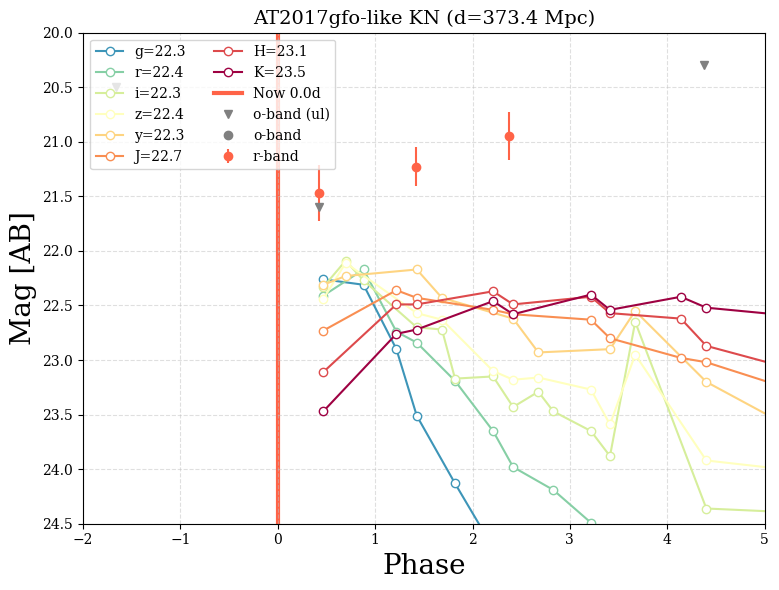

In [5]:
plt.close()
fig = plt.figure(figsize=(8, 6))
filterlist = ['g', 'r', 'i', 'z', 'y', 'J', 'H', 'K',]
expected_magdict = expect_AT2017gfo(dprime=distmean, phase=phase, filterlist=filterlist, plot=True)
#
plt.errorbar(delta_t[mask_r], r_mag[mask_r], yerr=r_dmag[mask_r], fmt='o', color='tomato', label='r-band')
plt.plot(delta_t[mask_o_upper], o_mag[mask_o_upper], 'v', color='grey', label='o-band (ul)')
plt.plot(delta_t[mask_o_normal], o_mag[mask_o_normal], 'o', color='grey', label='o-band')
#
# yu, yl = plt.ylim()
plt.legend(loc='upper left', ncol=2)
plt.ylim([24.5, 20])
plt.xlim([-2, 5])

(-1.0, 5.0)

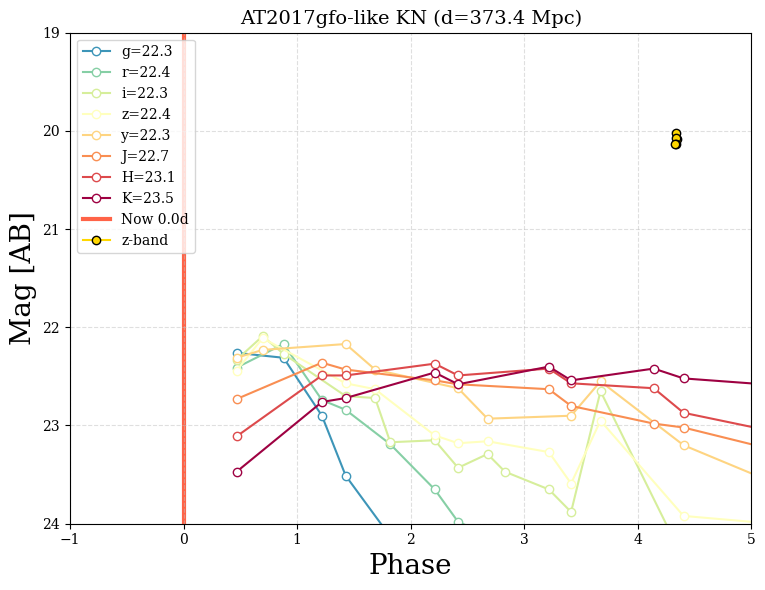

In [10]:
plt.close()
fig = plt.figure(figsize=(8, 6))
filterlist = ['g', 'r', 'i', 'z', 'y', 'J', 'H', 'K',]
expected_magdict = expect_AT2017gfo(dprime=distmean, phase=phase, filterlist=filterlist, plot=True)
#
delta_t = np.array([60717.2343252731, 60717.2324771839, 60717.2287812397, 60717.2250864366, 60717.2232387695]) - t0_mjd
z_mag = [20.0855, 20.0243, 20.0709, 20.1323, 20.1306]
plt.plot(delta_t, z_mag, 'o-', color='gold', mec='k', label='z-band')

#
# yu, yl = plt.ylim()
plt.legend(loc='upper left', ncol=1)
plt.ylim([24, 19])
plt.xlim([-1, 5])